# **Category Classification**

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import string
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import pickle

## Load Dataset

In [85]:


# Provide the full path to your CSV file
file_path = '/content/drive/My Drive/Data 240/project/compiled_news_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Filename,Unique ID,Content,Summary,Category
0,289.txt,289,Musicians to tackle US red tape\n\nMusicians' ...,Nigel McCune from the Musicians' Union said Br...,entertainment
1,262.txt,262,"U2's desire to be number one\n\nU2, who have w...",But they still want more.They have to want to ...,entertainment
2,276.txt,276,Rocker Doherty in on-stage fight\n\nRock singe...,"Babyshambles, which he formed after his acrimo...",entertainment
3,060.txt,60,Snicket tops US box office chart\n\nThe film a...,A Series of Unfortunate Events also stars Scot...,entertainment
4,074.txt,74,Ocean's Twelve raids box office\n\nOcean's Twe...,"Ocean's Twelve, the crime caper sequel starrin...",entertainment


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Filename   2225 non-null   object
 1   Unique ID  2225 non-null   int64 
 2   Content    2225 non-null   object
 3   Summary    2225 non-null   object
 4   Category   2225 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.0+ KB


In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_categories(df, category_column):
    """Encodes the target categories in the specified column using LabelEncoder and returns the mapping."""
    # Initialize the LabelEncoder
    encoder = LabelEncoder()

    # Fit and transform the specified category column
    df['Encoded_Category'] = encoder.fit_transform(df[category_column])

    # Create a mapping of original categories to encoded values
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    print("Label encoding complete.")
    return df, mapping



# Encode the 'Category' column
df, category_mapping = label_encode_categories(df, 'Category')

# Display the DataFrame with encoded labels and the mapping
print(df[['Category', 'Encoded_Category']])
print("Mapping of original categories to encoded values:", category_mapping)

Label encoding complete.
           Category  Encoded_Category
0     entertainment                 1
1     entertainment                 1
2     entertainment                 1
3     entertainment                 1
4     entertainment                 1
...             ...               ...
2220           tech                 4
2221           tech                 4
2222           tech                 4
2223           tech                 4
2224           tech                 4

[2225 rows x 2 columns]
Mapping of original categories to encoded values: {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


## Data Wrangling

In [61]:
df.drop(['Unique ID','Filename'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content   2225 non-null   object
 1   Summary   2225 non-null   object
 2   Category  2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [63]:
df['Category'].value_counts()

,count
Category,
sport,511
business,510
politics,417
tech,401
entertainment,386


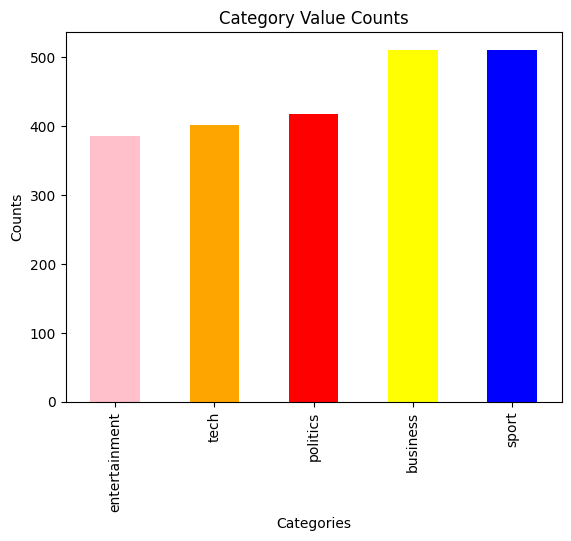

In [64]:
category_counts = df['Category'].value_counts().sort_values()

# Plot the bar chart
category_counts.plot(kind='bar', color=["pink", "orange", "red", "yellow", "blue"])

# Show the plot
plt.title('Category Value Counts')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

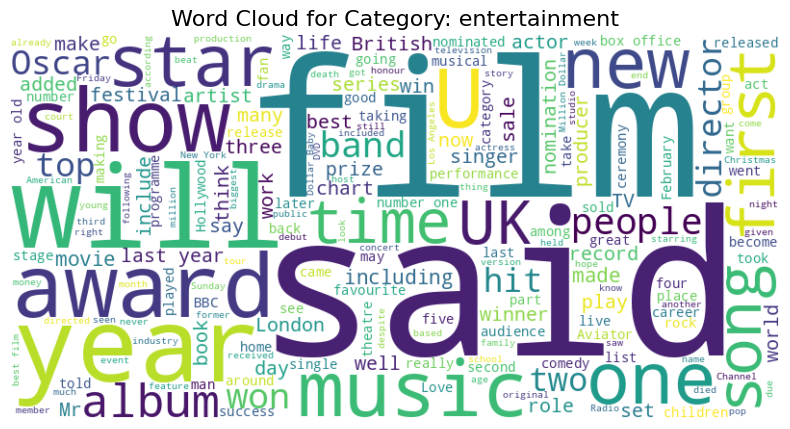

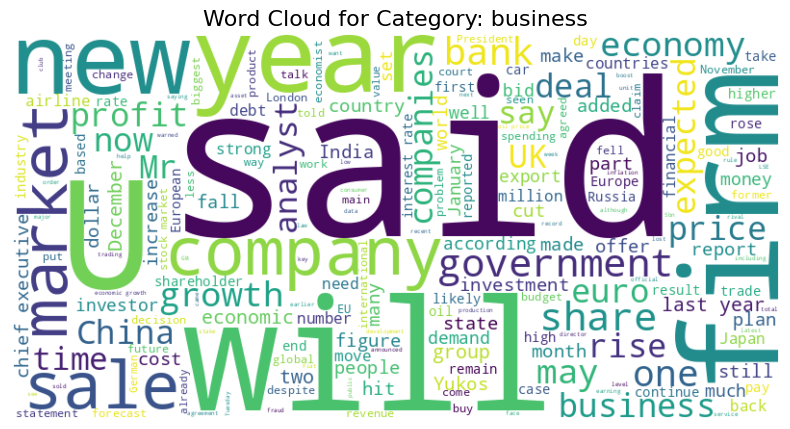

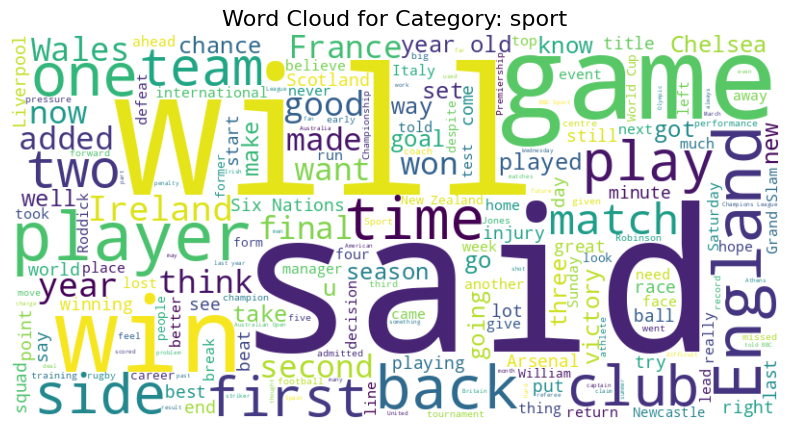

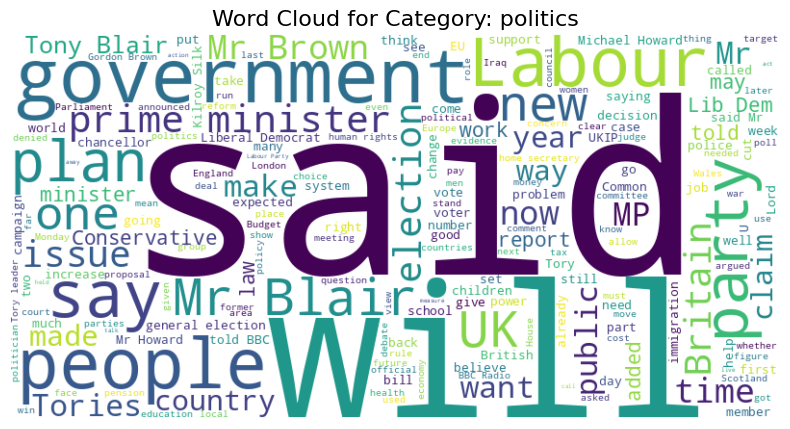

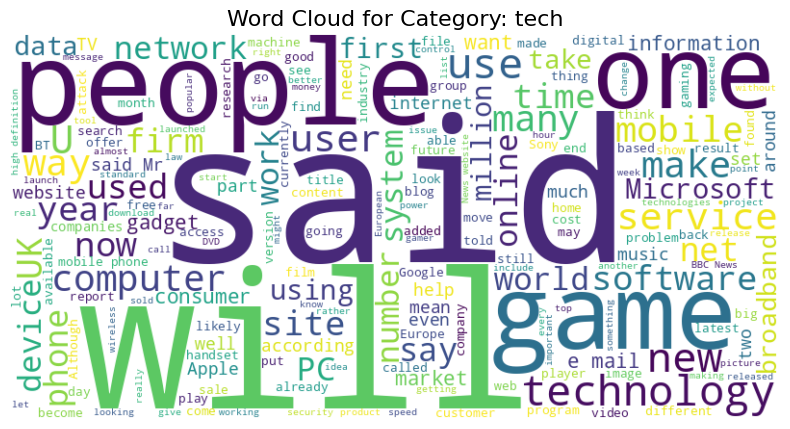

In [65]:
from wordcloud import WordCloud
# Iterate through each unique category and generate a word cloud
for category in df['Category'].unique():
    # Filter the DataFrame for the specific category
    category_texts = df[df['Category'] == category]['Content']

    # Combine all news texts into a single string
    text = ' '.join(category_texts)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud for Category: {category}', fontsize=16)
    plt.show()

In [66]:


def label_encode_categories(df, category_column):
    """Encodes the target categories in the specified column using LabelEncoder."""
    # Initialize the LabelEncoder
    encoder = LabelEncoder()

    # Fit and transform the specified category column
    df['Category'] = encoder.fit_transform(df[category_column])

    print("Label encoding complete.")
    return df


    # Encode the 'category' column
df = label_encode_categories(df, 'Category')

    # Display the DataFrame with encoded labels
print(df[['Category']].value_counts())


Label encoding complete.
Category
3           511
0           510
2           417
4           401
1           386
Name: count, dtype: int64


In [67]:
df.duplicated().sum()

98

In [68]:
df.isnull().sum()

,0
Content,0
Summary,0
Category,0


In [69]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Define a class with all preprocessing methods
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def remove_tags(self, text):
        """Remove HTML tags."""
        return re.sub(r'<.*?>', '', text)

    def remove_special(self, text):
        """Remove special characters."""
        return text.translate(str.maketrans('', '', string.punctuation))

    def convert_to_lower(self, text):
        """Convert text to lowercase."""
        return text.lower()

    def lemmatize_text(self, text):
        """Lemmatize the text."""
        return ' '.join([self.lemmatizer.lemmatize(word) for word in text.split()])

    def remove_stopwords(self, text):
        """Remove stopwords from the text."""
        return ' '.join([word for word in text.split() if word.lower() not in self.stop_words])

    def preprocess(self, text):
        """Apply all preprocessing steps to the text data."""
        text = self.remove_tags(text)
        text = self.remove_special(text)
        text = self.convert_to_lower(text)
        text = self.lemmatize_text(text)
        text = self.remove_stopwords(text)
        return text

# Preprocessing Pipeline Class
class NewsPipeline:
    def __init__(self):
        self.preprocessor = TextPreprocessor()
        self.tfidf_vectorizer = TfidfVectorizer()

    def preprocess(self, df, text_column):
        """Preprocess the text column using the preprocessor and vectorize."""
        df[text_column] = df[text_column].apply(self.preprocessor.preprocess)
        print("Preprocessing completed")
        return df

    def fit_vectorizer(self, df, text_column):
        """Fit the TF-IDF vectorizer on the preprocessed text."""
        self.tfidf_vectorizer.fit(df[text_column])
        print("TF-IDF Vectorizer fitted")

    def transform_vectorizer(self, texts):
        """Transform new texts into TF-IDF features."""
        return self.tfidf_vectorizer.transform(texts)

    def save_model(self, preprocessor_filename, vectorizer_filename):
        """Save the preprocessor and vectorizer to files for later use."""
        with open(preprocessor_filename, 'wb') as file:
            pickle.dump(self.preprocessor, file)
        with open(vectorizer_filename, 'wb') as file:
            pickle.dump(self.tfidf_vectorizer, file)
        print(f"Preprocessor saved as {preprocessor_filename} and Vectorizer saved as {vectorizer_filename}")

    @staticmethod
    def load_model(preprocessor_filename, vectorizer_filename):
        """Load the preprocessor and vectorizer from files."""
        with open(preprocessor_filename, 'rb') as file:
            preprocessor = pickle.load(file)
        with open(vectorizer_filename, 'rb') as file:
            vectorizer = pickle.load(file)
        return preprocessor, vectorizer

# Example usage
if __name__ == "__main__":


    # Initialize the news processing pipeline
    news_pipeline = NewsPipeline()

    # Preprocess the text data
    df = news_pipeline.preprocess(df, text_column='Content')

    # Fit the TF-IDF vectorizer
    news_pipeline.fit_vectorizer(df, text_column='Content')

    # Save the preprocessor and vectorizer for inference later
    news_pipeline.save_model('/content/drive/My Drive/Data 240/project/news_preprocessor.pkl', '/content/drive/My Drive/Data 240/project/tfidf_vectorizer.pkl')

    # To use the preprocessor and vectorizer later, you can load them using:
    # loaded_preprocessor, loaded_vectorizer = NewsPipeline.load_model('news_preprocessor.pkl', 'tfidf_vectorizer.pkl')
    # new_data = ["New article text for inference..."]
    # preprocessed_data = loaded_preprocessor.preprocess(new_data[0])
    # tfidf_features = loaded_vectorizer.transform([preprocessed_data])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing completed
TF-IDF Vectorizer fitted
Preprocessor saved as /content/drive/My Drive/Data 240/project/news_preprocessor.pkl and Vectorizer saved as /content/drive/My Drive/Data 240/project/tfidf_vectorizer.pkl


In [53]:
df.head(19)

,Content,Summary,Category
0,musician tackle u red tape musician group tack...,Nigel McCune from the Musicians' Union said Br...,1
1,u2s desire number one u2 three prestigious gra...,But they still want more.They have to want to ...,1
2,rocker doherty onstage fight rock singer pete ...,"Babyshambles, which he formed after his acrimo...",1
3,snicket top u box office chart film adaptation...,A Series of Unfortunate Events also stars Scot...,1
4,ocean twelve raid box office ocean twelve crim...,"Ocean's Twelve, the crime caper sequel starrin...",1
5,landmark movie 2004 hailed u film professional...,The Institute also cited the death of actor Ma...,1
6,pete doherty miss bail deadline singer pete do...,Mr Wass was also given a curfew and told to su...,1
7,fockers retain film chart crown comedy meet fo...,Meet the Fockers also broke the box office rec...,1
8,top gig award scissor sister new york band sci...,New York band Scissor Sisters have won a gig o...,1
9,johnny depp acting outlaw johnny depp whose la...,"He played a much more serious, sensitive role ...",1


In [70]:
import pandas as pd

from sklearn.model_selection import train_test_split

if __name__ == "__main__":


    # Initialize the news processing pipeline
    news_pipeline = NewsPipeline()

    # Preprocess the text data
    df = news_pipeline.preprocess(df, text_column='Content')

    # Fit the TF-IDF vectorizer
    news_pipeline.fit_vectorizer(df, text_column='Content')

    # Save the preprocessor and vectorizer for inference later
    news_pipeline.save_model('/content/drive/My Drive/Data 240/project/news_preprocessor.pkl', '/content/drive/My Drive/Data 240/project/tfidf_vectorizer.pkl')

    # Now let's assume you have a target variable 'label' for classification
    X = news_pipeline.tfidf_vectorizer.transform(df['Content'])  # Get TF-IDF features
    y = df['Category']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Preprocessing completed
TF-IDF Vectorizer fitted
Preprocessor saved as /content/drive/My Drive/Data 240/project/news_preprocessor.pkl and Vectorizer saved as /content/drive/My Drive/Data 240/project/tfidf_vectorizer.pkl


# **Modeling**

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1780, 30524)
(1780,)
(445, 30524)
(445,)


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mnb = MultinomialNB()
# Define the parameters to tune
parameters = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Initialize GridSearchCV with MultinomialNB and parameters
grid_search = GridSearchCV(mnb, parameters, cv=5, scoring='accuracy')

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_mnb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_mnb.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Improved Accuracy: {accuracy * 100:.2f}%')

Best Parameters: {'alpha': 0.1}
Improved Accuracy: 97.98%


In [73]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, y_train, X_test, and y_test are already defined

# Best parameters (from grid search or other tuning method)
best_params = {'alpha': 0.1}

# Initialize the Multinomial Naive Bayes model with the best parameters
mnb = MultinomialNB(**best_params)

# Train the model on the training data
mnb.fit(X_train, y_train)

# Save the trained model to a file
model_filename = '/content/drive/My Drive/Data 240/project/multinomial_nb_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(mnb, file)
print(f"Model saved as '{model_filename}'")

# Load the model for predictions on the test data
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions on the test data using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a classification report to see detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print a confusion matrix to understand the performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model saved as '/content/drive/My Drive/Data 240/project/multinomial_nb_model.pkl'
Accuracy: 97.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       103
           1       1.00      0.98      0.99        84
           2       0.95      0.99      0.97        80
           3       1.00      0.99      0.99        98
           4       0.96      1.00      0.98        80

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

Confusion Matrix:
 [[98  0  2  0  3]
 [ 0 82  2  0  0]
 [ 1  0 79  0  0]
 [ 1  0  0 97  0]
 [ 0  0  0  0 80]]


In [91]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Ensure that NLTK's punkt tokenizer is downloaded
nltk.download('punkt')

# Reference summaries (can be multiple)
reference_summary = [
    "A Series of Unfortunate Events is the film adaptation of Lemony Snicket's popular children's books. It features a surreal storyline and a cast that includes Jim Carrey, Billy Connelly, and Meryl Streep. The film follows three orphaned children targeted by their wicked uncle, Count Olaf, who seeks their fortune."
]

# Generated summary
generated_summary = (
    "A Series of Unfortunate Events, the film adaptation of Lemony Snicket's popular children's books, has debuted at the top of the North American box office, earning $30.2 million in its opening weekend. Starring Jim Carrey as the villainous Count Olaf, the film features a surreal storyline and a cast that includes Billy Connelly and Meryl Streep. The film follows three orphaned children who are targeted by their wicked uncle, Count Olaf, who seeks their fortune."
)

# Tokenize the reference and generated summaries
reference_tokens = [nltk.word_tokenize(ref) for ref in reference_summary]
generated_tokens = nltk.word_tokenize(generated_summary)

# Calculate the BLEU score
bleu_score = sentence_bleu(reference_tokens, generated_tokens)

print(f"BLEU Score: {bleu_score:.4f}")


BLEU Score: 0.5029


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Ensure that NLTK's punkt tokenizer is downloaded
nltk.download('punkt')

# Reference summaries (can be multiple)
reference_summary = [
    "A Series of Unfortunate Events is the film adaptation of Lemony Snicket's popular children's books. It features a surreal storyline and a cast that includes Jim Carrey, Billy Connelly, and Meryl Streep. The film follows three orphaned children targeted by their wicked uncle, Count Olaf, who seeks their fortune."
]

# Generated summary
generated_summary = (
"The film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Ocean's 12. A Series of Unfortunate Events, starring Jim Carrey, took $30.2m (£15.5m) in its debut weekend. Ocean's 12 fell to number two while new entry Spanglish entered the chart at number three, taking $9m (£4.6m). A Series of Unfortunate Events also stars Scottish comedian Billy Connelly, while Carrey takes on a number of different roles in the surreal film. The only other new entry in the top 10 was re-make, Flight of the Phoenix, at number eight, starring Dennis Quaid. Carrey entertained crowds at the UK premiere of Lemony Snicket in London on Friday. The actor grabbed co-star Meryl Streep and whisked her around Leicester Square. Based on the cult children's books by author Daniel Handler, the film follows three children who are orphaned when their parents die in a fire. They are taken in by their wicked uncle Count Olaf, played by Carrey, who schemes to get his hands on their fortune.")

# Tokenize the reference and generated summaries
reference_tokens = [nltk.word_tokenize(ref) for ref in reference_summary]
generated_tokens = nltk.word_tokenize(generated_summary)

# Calculate the BLEU score
bleu_score = sentence_bleu(reference_tokens, generated_tokens)

print(f"BLEU Score: {bleu_score:.4f}")

BLEU Score: 0.0882


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
from prettytable import PrettyTable, ALL
import textwrap

# Data for the table
data = {
    "Method": ["TF-IDF Extractive", "Gemini Abstractive"],
    "Summary": [
        "The film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Ocean's 12. A Series of Unfortunate Events, starring Jim Carrey, took $30.2m (£15.5m) in its debut weekend. Ocean's 12 fell to number two while new entry Spanglish entered the chart at number three, taking $9m (£4.6m). A Series of Unfortunate Events also stars Scottish comedian Billy Connelly, while Carrey takes on a number of different roles in the surreal film. The only other new entry in the top 10 was re-make, Flight of the Phoenix, at number eight, starring Dennis Quaid. Carrey entertained crowds at the UK premiere of Lemony Snicket in London on Friday. The actor grabbed co-star Meryl Streep and whisked her around Leicester Square. Based on the cult children's books by author Daniel Handler, the film follows three children who are orphaned when their parents die in a fire. They are taken in by their wicked uncle Count Olaf, played by Carrey, who schemes to get his hands on their fortune.",
        "A Series of Unfortunate Events, the film adaptation of Lemony Snicket's popular children's books, has debuted at the top of the North American box office, earning $30.2 million in its opening weekend. Starring Jim Carrey as the villainous Count Olaf, the film features a surreal storyline and a cast that includes Billy Connelly and Meryl Streep. The film follows three orphaned children who are targeted by their wicked uncle, Count Olaf, who seeks their fortune."
    ],
    "BLEU Score": [0.0882, 0.5029],
    "Comments": [
        "Extractive summary generated using TF-IDF.",
        "Abstractive summary generated using Gemini model."
    ]
}

# Create PrettyTable
table = PrettyTable()

# Add columns to the table
table.field_names = ["Method", "Summary", "BLEU Score", "Comments"]

# Set maximum width for the Summary column
max_width = 50  # Define max width for text wrapping

# Add data to the table, wrapping the summary text
for i in range(len(data["Method"])):
    method = data["Method"][i]
    summary = "\n".join(textwrap.wrap(data["Summary"][i], width=max_width))
    bleu_score = data["BLEU Score"][i]
    comments = data["Comments"][i]
    table.add_row([method, summary, bleu_score, comments])

    # Add a line after each row
    if i < len(data["Method"]) - 1:
        table.add_row(["", "", "", ""])  # Add an empty row for spacing

# Set hrules to display lines after each row
table.hrules = ALL  # This will display a horizontal line after every row

# Display the table
print(table)


+--------------------+----------------------------------------------------+------------+---------------------------------------------------+
|       Method       |                      Summary                       | BLEU Score |                      Comments                     |
+--------------------+----------------------------------------------------+------------+---------------------------------------------------+
| TF-IDF Extractive  |  The film adaptation of Lemony Snicket novels has  |   0.0882   |     Extractive summary generated using TF-IDF.    |
|                    |     topped the North America box office chart,     |            |                                                   |
|                    |   displacing Ocean's 12. A Series of Unfortunate   |            |                                                   |
|                    | Events, starring Jim Carrey, took $30.2m (£15.5m)  |            |                                                   |
|            